## Day 50 Lecture 2 Assignment

In this assignment, we will apply various methods of internal evaluation to the results of K-Means clustering on a dataset containing the results of a survey on financial wellbeing.

In [6]:
!pip install kneed

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

from kneed import KneeLocator

This dataset contains the results of a survey on a financial wellbeing conducted by the US Consumer Finance Protection Bureau that were published in October 2017. This dataset has a large number of columns, most of which correspond to specific questions on the survey. These codebook for translating the column names to questions can be found here:

https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

Load the dataset.

In [18]:
# answer goes here
url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/financial_wellbeing.csv'

financial_df = pd.read_csv(url)

financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Columns: 217 entries, PUF_ID to finalwt
dtypes: float64(2), int64(215)
memory usage: 10.6 MB


As we did in the previous assignment, we will only use the score columns. Filter the columns of the dataset to only include these columns.

In [19]:
# answer goes here
score_df = financial_df.filter(like='score', axis=1)

score_df.describe()

,FWBscore,FSscore,LMscore,KHscore
count,6394.000000,6394.000000,6394.000000,6394.000000
mean,56.034094,50.719112,2.506256,-0.056935
std,14.154676,12.656921,0.755215,0.814936
min,-4.000000,-1.000000,0.000000,-2.053000
25%,48.000000,42.000000,2.000000,-0.570000
50%,56.000000,50.000000,3.000000,-0.188000
75%,65.000000,57.000000,3.000000,0.712000
max,95.000000,85.000000,3.000000,1.267000


Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [10]:
# answer goes here
scaler = StandardScaler()

score_df_std = pd.DataFrame(scaler.fit_transform(score_df), index=score_df.index)

pca = PCA(n_components=2)
score_df_pca = pca.fit_transform(score_df_std)

Create an elbow plot showing how the SSE changes with respect to the number of clusters in K-Means. Allow K to vary from 2 to 30. Does a clear "elbow" emerge from the plot?

2 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,61.405906,54.226226,2.902152,0.393911,3991
1,47.082569,44.874896,1.846539,-0.808220,2403


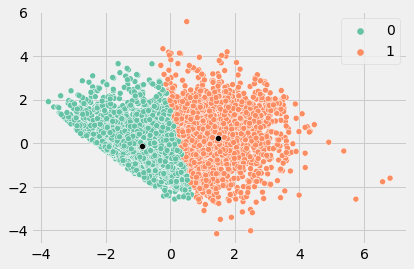



3 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,48.355804,43.582589,2.906250,0.067357,2233
1,49.348050,47.145069,1.497133,-0.957565,1751
2,68.009129,59.938589,2.864730,0.479283,2410


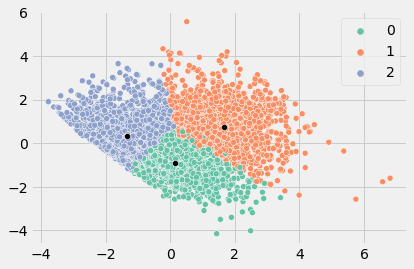



4 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,62.736945,52.451440,2.929722,0.631903,2051
1,49.025672,46.557457,1.476773,-0.967881,1635
2,45.552452,42.436716,2.877993,-0.097656,1754
3,72.909948,69.343455,2.678534,0.100449,954


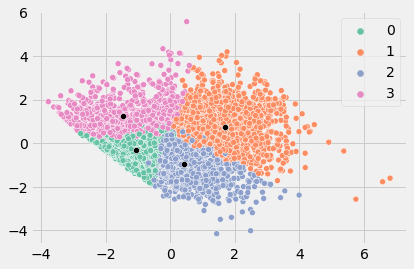



5 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,59.078588,59.908884,1.872437,-0.740123,881
1,60.464008,51.542315,2.939689,0.527426,2052
2,44.918744,40.987996,1.369344,-1.054408,1082
3,75.943807,67.388761,2.916284,0.566899,874
4,44.669103,41.577409,2.864452,-0.100342,1505


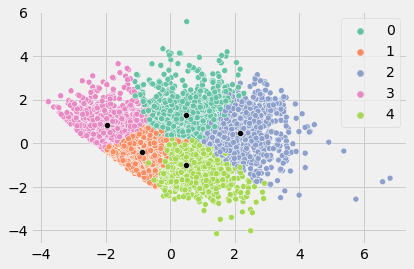



6 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,59.979304,57.271872,2.337723,-0.555515,1064
1,45.542479,42.375348,2.953343,0.003428,1434
2,50.092949,49.600962,0.788462,-1.089998,624
3,61.848783,51.897451,2.960023,0.693092,1726
4,42.461635,37.830189,1.918239,-0.870833,795
5,76.478667,69.288000,2.897333,0.530320,751


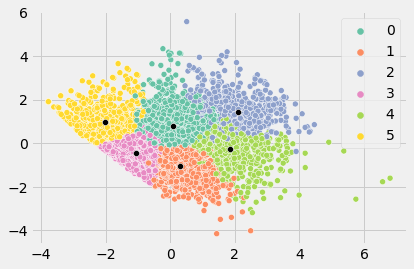



7 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,61.188047,52.037901,2.852041,-0.115163,1375
1,46.747913,42.757930,0.787980,-1.064272,599
2,61.459227,52.140773,2.948498,0.928760,1165
3,43.229221,41.149606,2.919510,0.155006,1142
4,58.026465,65.448015,1.739130,-0.865134,529
5,76.832158,69.256700,2.906911,0.566121,709
6,45.779932,40.806157,2.151653,-0.879636,875


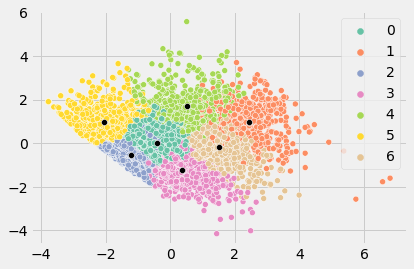



8 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,53.109890,73.794872,1.710623,-0.977905,273
1,43.086525,39.497872,2.178723,-0.963051,705
2,76.922857,69.375714,2.911429,0.570789,699
3,61.449486,52.165240,2.948630,0.928203,1169
4,46.302120,42.572438,0.777385,-1.112618,566
5,43.110599,40.798157,2.937327,0.163988,1086
6,60.385382,52.220100,3.000000,-0.132590,1204
7,60.753247,51.340548,1.877345,-0.418996,692


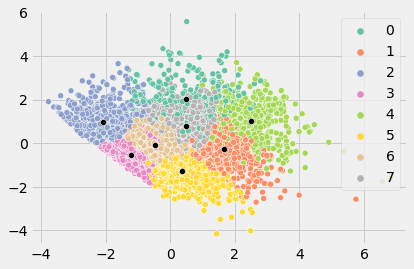



9 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,55.624096,50.066265,3.000000,-0.489173,830
1,39.464489,37.294034,2.909091,0.055115,704
2,46.373882,42.234347,0.778175,-1.102651,560
3,76.686937,75.425676,2.873874,0.381885,444
4,70.272374,56.699416,2.972763,0.712459,1028
5,54.965927,49.178288,2.976228,0.644639,1262
6,61.503030,51.403030,1.893939,-0.294761,657
7,51.717314,70.946996,1.583039,-1.067265,283
8,44.108974,40.121795,2.028846,-0.960527,626


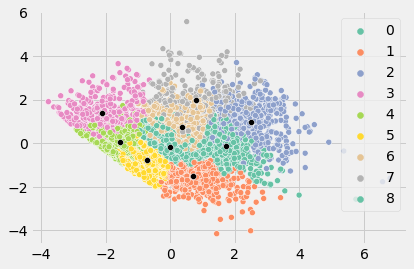



10 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,66.639831,55.227754,2.985169,0.959108,944
1,46.638554,42.745267,0.786575,-1.098355,581
2,50.013198,45.397970,2.965482,0.602492,985
3,53.501805,72.689531,1.628159,-1.011989,277
4,46.204545,42.449675,2.003247,-0.976946,616
5,50.230088,45.205015,3.000000,-0.510532,677
6,33.357702,32.853786,2.736292,-0.148029,383
7,78.054705,74.122538,2.892779,0.496510,457
8,62.067633,51.579710,1.906602,-0.212391,621


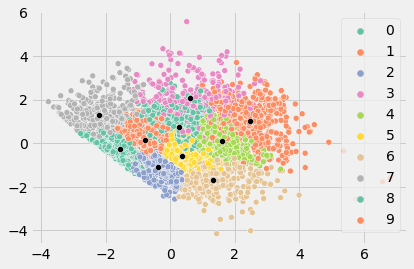



11 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,52.860707,44.640333,2.964657,0.630207,966
1,46.141071,42.205357,0.783929,-1.094852,560
2,51.655232,43.133791,3.000000,-0.528496,583
3,34.110256,32.666667,2.746154,-0.083585,386
4,77.807780,74.942792,2.881007,0.441945,438
5,46.551724,42.129721,2.001642,-0.980501,609
6,64.888060,55.187811,3.000000,-0.047730,803
7,67.443195,56.151856,2.979753,0.976702,889
8,55.903101,71.166667,1.449612,-1.127593,258


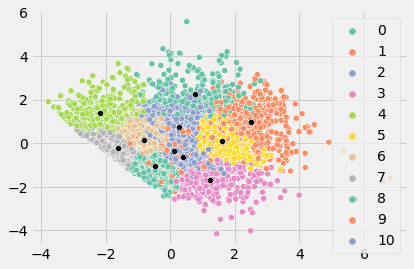



12 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,49.964981,44.540856,0.764591,-1.122411,515
1,53.133056,46.390852,2.990644,0.613554,962
2,69.531773,66.488294,1.759197,-0.791652,299
3,67.485057,55.936782,2.977011,0.973109,870
4,49.918200,43.944785,2.000000,-1.050830,489
5,57.542240,48.483301,1.944990,-0.017297,508
6,64.571782,55.878713,3.000000,-0.063599,808
7,77.605263,74.480861,2.940191,0.552892,418
8,35.993023,37.288372,2.960465,0.157656,430


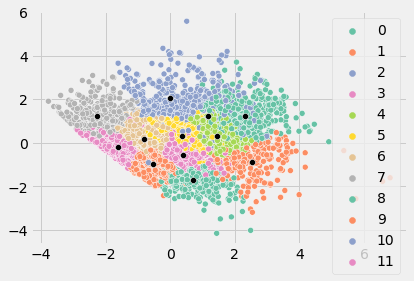



13 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,75.780679,75.900783,2.953003,0.521718,383
1,50.008147,44.028513,2.000000,-1.049010,490
2,61.085155,54.866513,3.000000,-0.096147,869
3,49.562712,41.179661,3.000000,-0.537597,590
4,50.125714,44.007619,0.773333,-1.113259,524
5,77.398323,56.366876,2.930818,0.699107,477
6,51.992826,41.807747,2.984218,0.562925,697
7,68.683849,67.525773,1.793814,-0.826127,293
8,60.536896,54.698473,2.991094,0.962668,786


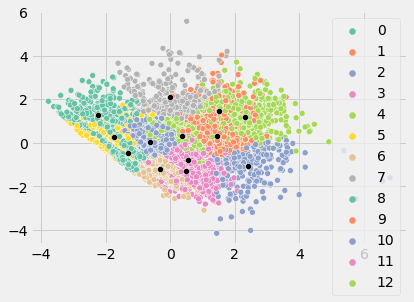



14 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,69.360714,67.760714,1.925000,-0.769814,280
1,57.503043,48.709939,1.969574,-0.017748,493
2,77.274262,56.339662,2.938819,0.719616,473
3,52.571429,41.925035,2.984441,0.563825,707
4,76.162983,76.248619,2.955801,0.549641,363
5,33.299652,29.540070,2.379791,-0.538031,287
6,42.411940,37.656716,0.788060,-1.097293,335
7,51.145000,42.795000,3.000000,-0.528293,600
8,61.602978,55.627792,3.000000,-0.074413,806


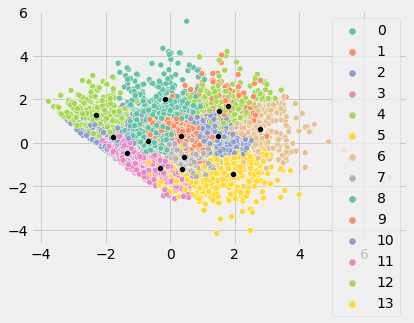



15 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,61.467391,55.589674,2.990489,0.975173,737
1,50.681102,44.929134,2.000000,-1.064898,508
2,76.290503,75.944134,2.966480,0.586042,358
3,63.110672,54.856390,3.000000,-0.056603,758
4,45.660221,39.629834,0.781768,-1.141423,362
5,69.439689,69.937743,1.972763,-0.765148,257
6,35.923944,35.585915,2.960563,0.129949,356
7,78.529412,56.161765,2.921569,0.705770,408
8,53.243935,43.516173,2.987871,0.602067,742


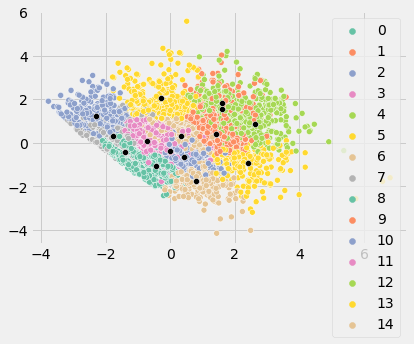



16 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,63.065217,55.937888,2.021739,-0.764224,322
1,53.502019,43.393001,2.995962,0.590257,744
2,34.234848,67.734848,1.462121,-1.079508,132
3,35.846821,34.557803,2.945087,0.105957,347
4,47.606715,41.342926,0.772182,-1.127043,417
5,75.965732,74.975078,2.975078,0.766813,321
6,51.722719,42.577818,3.000000,-0.550517,558
7,48.303983,42.155136,2.000000,-0.979323,477
8,56.206107,47.506361,1.938931,0.151374,393


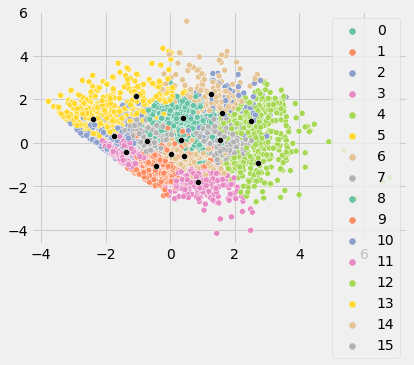



17 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,65.842857,78.021429,1.700000,-0.939657,140
1,51.981453,42.404946,2.995363,0.546861,647
2,63.260363,54.040155,3.000000,-0.084823,771
3,66.270968,56.106452,1.967742,-0.537545,310
4,58.559471,51.942731,0.792952,-1.010383,227
5,34.314570,35.791391,2.983444,0.092384,302
6,77.097156,55.971564,2.940758,0.800213,422
7,84.975845,76.362319,2.917874,0.449483,207
8,31.318182,30.559091,1.900000,-0.729395,220


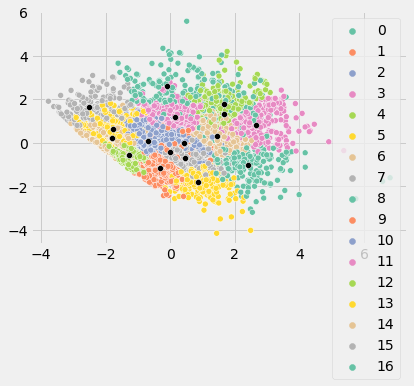



18 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,63.974886,54.292237,3.000000,-0.419701,439
1,31.248705,28.891192,1.943005,-0.843285,193
2,78.141304,57.182065,2.967391,0.877476,368
3,41.729730,58.000000,2.965251,-0.071544,259
4,31.773913,66.686957,1.382609,-0.997304,115
5,65.591362,71.186047,2.993355,0.618422,300
6,66.971510,54.883191,1.962963,-0.164783,351
7,51.144518,41.998339,2.991694,0.554392,600
8,50.520101,45.439698,2.000000,-1.211342,398


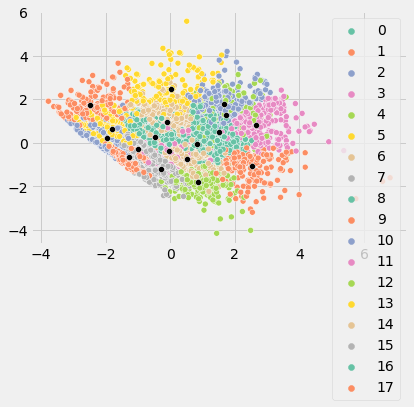



19 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,52.895044,44.970845,1.965015,0.063157,343
1,64.891156,71.302721,2.989796,0.633524,296
2,59.956643,52.685315,2.990210,0.963497,713
3,50.581081,41.831081,2.994932,0.569914,592
4,33.142857,67.226891,1.428571,-1.063622,119
5,34.293103,33.568966,2.951724,-0.006238,290
6,66.210145,78.130435,1.630435,-0.957471,138
7,68.287273,57.170909,3.000000,-0.510207,275
8,70.453782,56.571429,1.903361,-0.027908,238


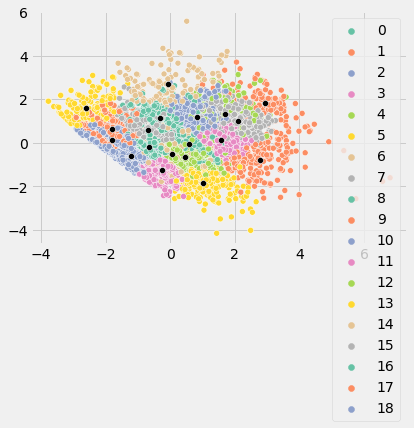



20 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,32.643564,29.386139,0.792079,-1.042188,101
1,61.663677,44.042601,2.986547,0.514630,446
2,64.778689,73.352459,2.983607,0.573684,244
3,51.773936,46.625000,2.000000,-1.218806,376
4,58.160000,55.219130,3.000000,-0.063614,575
5,53.079186,46.033937,1.975113,-0.165122,442
6,73.338658,56.591054,3.000000,-0.109927,313
7,35.333333,34.232932,2.012048,-0.734908,249
8,34.916667,68.908333,1.308333,-1.102092,120


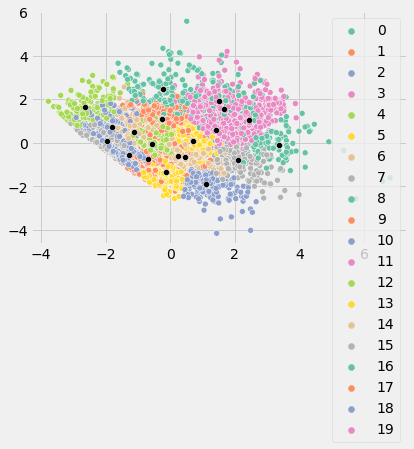



21 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,85.521505,76.494624,2.946237,0.606151,186
1,58.295455,54.719697,2.003788,-0.910655,264
2,50.451056,41.531670,3.000000,-0.508800,521
3,61.044678,53.703022,3.000000,0.487808,761
4,31.253012,27.867470,0.795181,-1.065639,83
5,34.276423,68.707317,1.382114,-1.073878,123
6,77.521739,55.785166,2.982097,0.736261,391
7,69.970588,78.161765,1.889706,-0.874875,136
8,46.802469,42.206790,2.003086,-1.188506,324


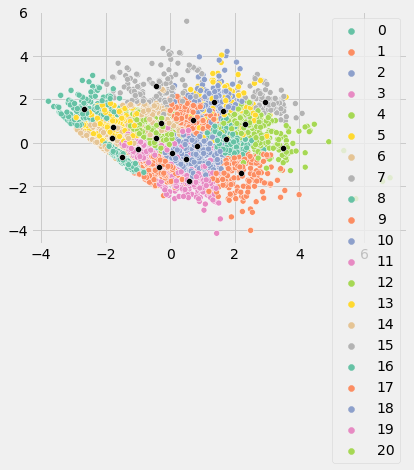



22 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,39.662791,59.761628,2.982558,-0.350535,172
1,56.411885,41.432377,2.991803,0.504961,488
2,48.340000,42.126667,2.003333,-1.222107,300
3,64.577061,69.612903,2.992832,0.761624,278
4,59.717514,53.175141,0.920904,-0.915102,177
5,51.445736,42.463178,3.000000,-0.530610,516
6,74.681818,54.360140,2.933566,-0.092720,286
7,47.085911,39.532646,0.979381,-1.108378,291
8,76.894040,76.437086,2.801325,-0.246106,151


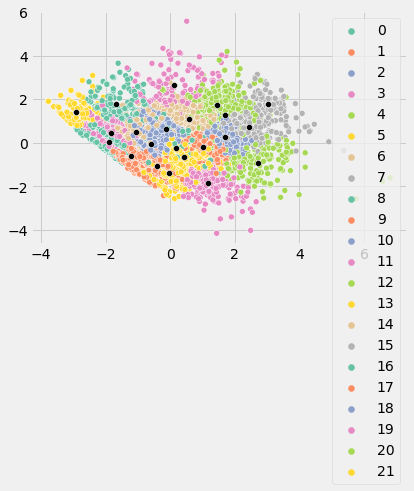



23 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,49.492569,41.180467,3.000000,-0.518257,471
1,76.168044,57.289256,2.988981,0.981091,365
2,59.909639,54.674699,0.915663,-0.933813,166
3,74.534545,57.109091,3.000000,-0.072105,276
4,59.663110,54.873476,2.998476,0.499210,653
5,56.871698,55.045283,2.000000,-0.903947,265
6,33.825000,67.916667,1.391667,-1.099875,120
7,32.010929,35.316940,1.994536,-0.716120,183
8,59.833708,43.049438,2.997753,0.411838,445


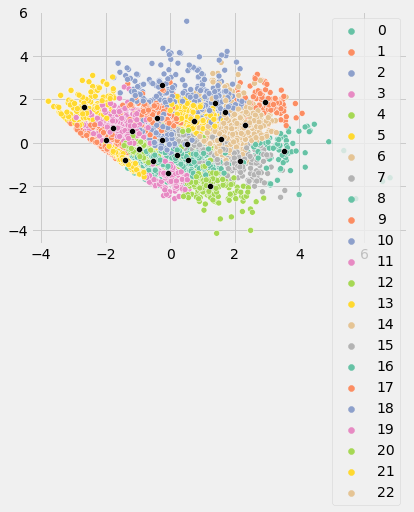



24 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,74.114187,57.017301,3.000000,-0.082789,289
1,49.631356,41.135593,3.000000,-0.514502,470
2,49.343434,46.020202,-0.000000,-1.299000,99
3,48.075269,41.218638,1.000000,-1.073720,279
4,57.144876,52.943463,1.989399,-0.197845,283
5,59.455927,52.744681,2.981763,1.267000,329
6,31.209581,33.682635,2.005988,-0.778377,167
7,61.035714,43.626190,3.000000,0.426340,420
8,57.434286,55.131429,2.011429,-1.210326,175


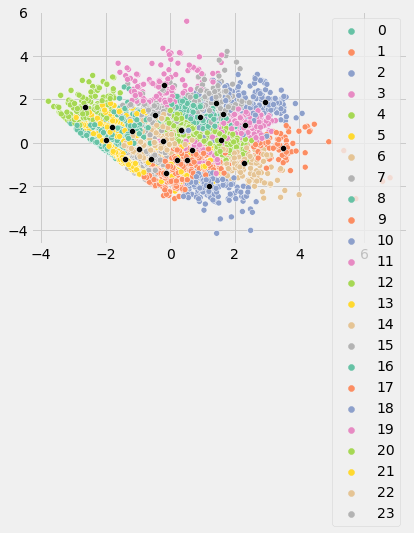



25 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,47.740484,40.335640,1.000000,-1.082201,289
1,58.364341,53.870801,3.000000,-0.444915,386
2,65.407563,71.634454,2.991597,0.760340,238
3,50.090349,41.646817,3.000000,0.039803,486
4,57.557252,54.179389,2.000000,-0.920832,262
5,62.333333,53.181818,1.946970,0.177553,264
6,47.246006,42.862620,2.980831,0.871585,312
7,30.496296,49.066667,1.740741,-0.939444,135
8,47.716981,43.235849,-0.000000,-1.327906,106


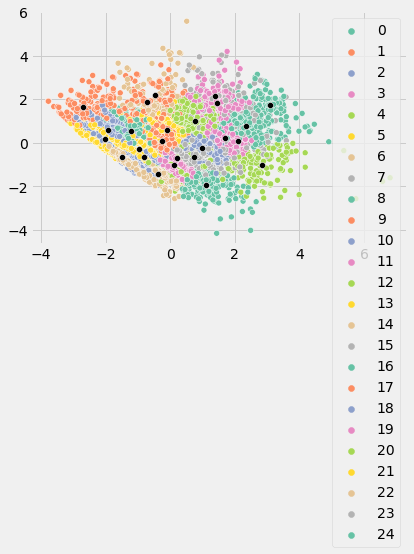



26 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,30.730337,20.067416,1.752809,-0.896697,89
1,53.743842,59.950739,3.000000,-0.559842,203
2,50.829032,41.654839,1.977419,-0.188710,310
3,85.069364,78.052023,2.942197,0.543214,173
4,50.325103,38.843621,0.987654,-1.046770,243
5,58.993939,55.127273,0.915152,-1.002473,165
6,74.075540,57.417266,3.000000,-0.131701,278
7,50.734043,41.563830,3.000000,0.036149,470
8,48.725948,42.921283,2.982507,0.883516,342


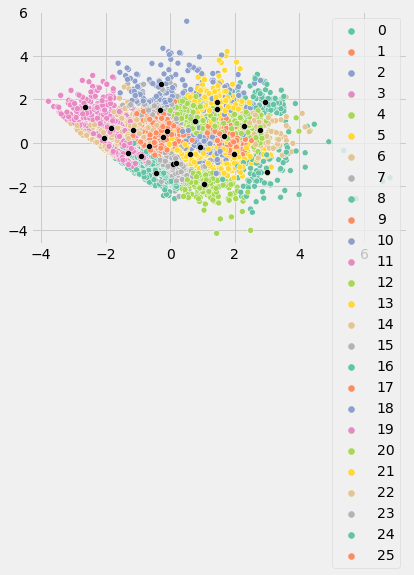



27 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,31.329787,61.361702,1.563830,-0.909894,94
1,58.579897,52.989691,3.000000,-0.438856,388
2,49.712329,41.032877,2.000000,-1.042677,365
3,65.725806,70.838710,2.991935,0.768210,248
4,54.181818,41.724138,2.981191,0.872063,319
5,48.044118,41.352941,1.000000,-1.115724,272
6,33.973451,22.911504,2.805310,-0.368265,113
7,74.350000,57.476923,3.000000,-0.058204,261
8,35.138686,57.248175,2.985401,-0.177423,137


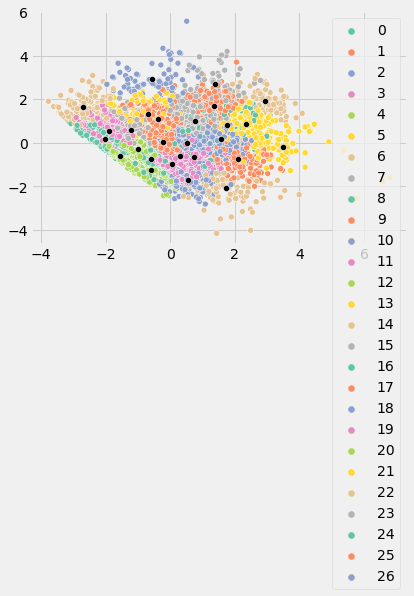



28 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,53.910494,41.500000,2.993827,0.866167,324
1,56.054455,56.668317,2.014851,-1.044223,202
2,58.337568,54.852995,3.000000,-0.025485,551
3,61.331768,53.319249,3.000000,0.927399,639
4,51.605590,43.512422,3.000000,-0.791981,322
5,74.947368,74.940789,2.993421,-0.159750,152
6,77.496774,56.293548,2.977419,0.950516,310
7,50.035714,44.428571,0.946429,-0.295107,112
8,62.272300,54.765258,1.957746,0.264300,213


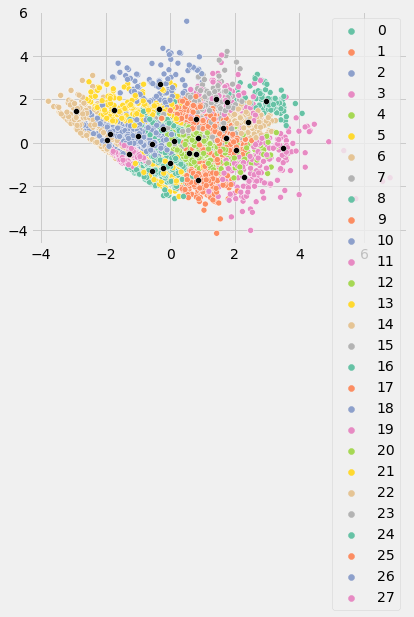



29 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,49.708333,41.446970,3.000000,-0.793455,264
1,64.983264,71.824268,2.987448,0.731770,239
2,49.751101,41.427313,3.000000,0.018476,454
3,61.681818,58.627273,0.854545,-1.125455,110
4,54.194444,43.215278,0.965278,-0.480194,145
5,57.576613,54.895161,2.000000,-0.941024,248
6,75.281915,62.617021,3.000000,-0.109702,188
7,62.038194,43.131944,2.993056,0.480865,288
8,48.936170,46.148936,-0.000000,-1.344149,94


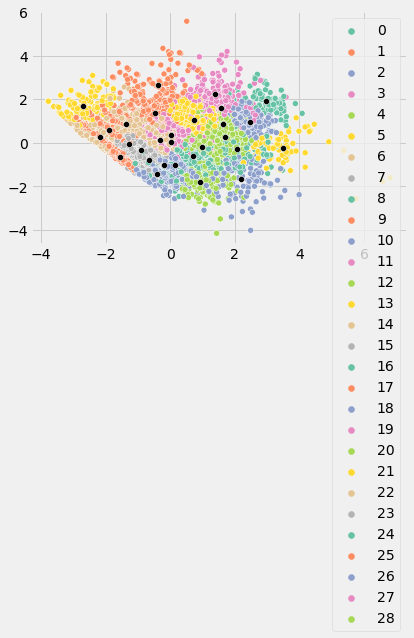



30 Clusters


,FWBscore,FSscore,LMscore,KHscore,Count
Archtype,,,,,
0,77.380952,56.247619,1.980952,-0.419695,105
1,64.568389,45.303951,2.993921,0.604036,328
2,37.719008,54.545455,3.000000,-0.550603,121
3,73.646341,57.268293,3.000000,0.039797,247
4,50.200426,41.187633,3.000000,0.037544,469
5,48.871795,41.571429,2.000000,-1.232458,273
6,66.124444,71.591111,2.991111,0.800733,225
7,64.575758,57.898990,0.848485,-1.113172,99
8,29.895833,53.947917,1.677083,-0.730677,96


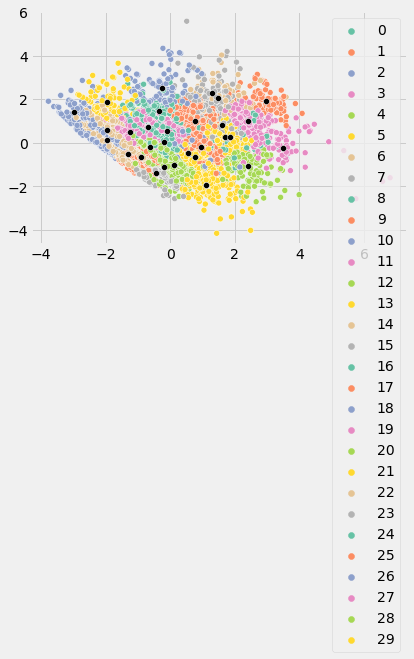

In [20]:
# answer goes here
sse = []
silhouette_coefficients = []
davies_scores = [] 

for n in range(2,31):
  print(f'{n} Clusters')
  km = KMeans(n_clusters=n)
  pred = km.fit_predict(score_df_std)
  cluster_centers = pd.DataFrame(scaler.inverse_transform(km.cluster_centers_), columns=score_df.columns).rename_axis('Archtype')
  cluster_centers['Count'] = pd.Series(pred).value_counts()
  display(cluster_centers.style.background_gradient())

  sse.append(km.inertia_)
  silhouette_coefficients.append(silhouette_score(score_df_std, km.labels_))
  davies_scores.append(davies_bouldin_score(score_df_std, km.labels_))

  pca_centers = pca.transform(km.cluster_centers_)
  sns.scatterplot(x=score_df_pca[:,0], y=score_df_pca[:,1], hue=pred, palette='Set2')
  sns.scatterplot(x=pca_centers[:,0], y=pca_centers[:,1], color='black')
  plt.legend()
  plt.show()
  print('\n')

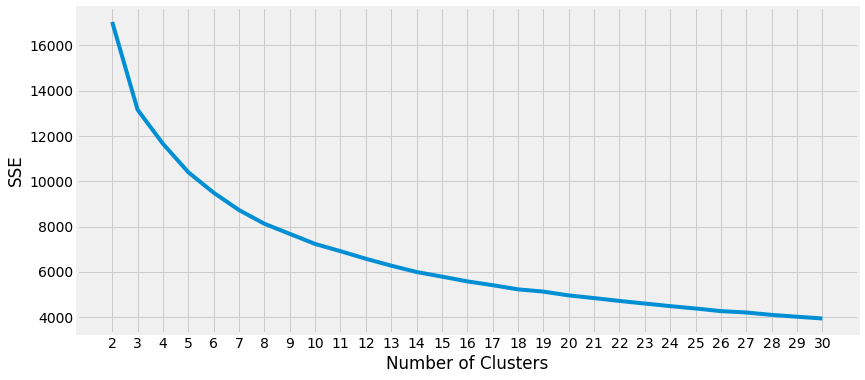

In [12]:
# answer goes here
plt.figure(figsize=(14,6))
plt.style.use("fivethirtyeight")
plt.plot(range(2,len(sse)+2), sse)
plt.xticks(range(2,len(sse)+2))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [14]:
kl = KneeLocator(range(2,len(sse)+2), sse, curve="convex", direction="decreasing")
kl.elbow

8

There is no clear elbow. 

Create a silhouette plot for the results of K-Means, again with K varying from 2 to 30. What is the optimal number of clusters according to the silhouette method? Is this consistent with the output of the elbow plot?

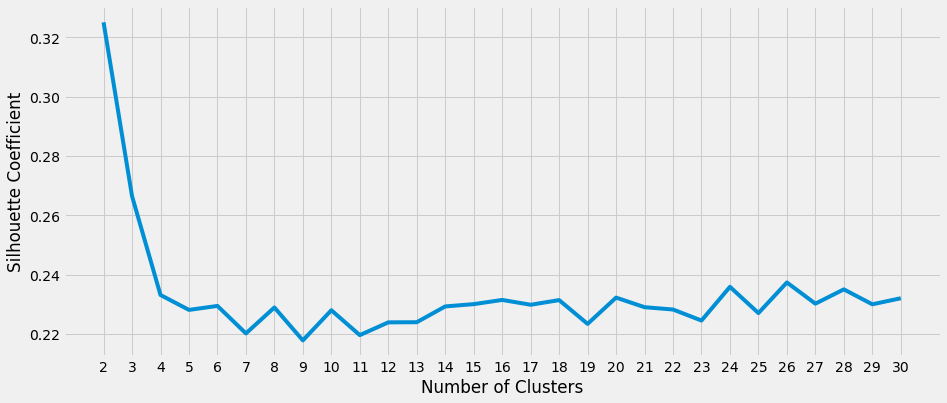

In [15]:
plt.figure(figsize=(14,6))
plt.style.use("fivethirtyeight")
plt.plot(range(2, len(silhouette_coefficients)+2), silhouette_coefficients)
plt.xticks(range(2, len(silhouette_coefficients)+2))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

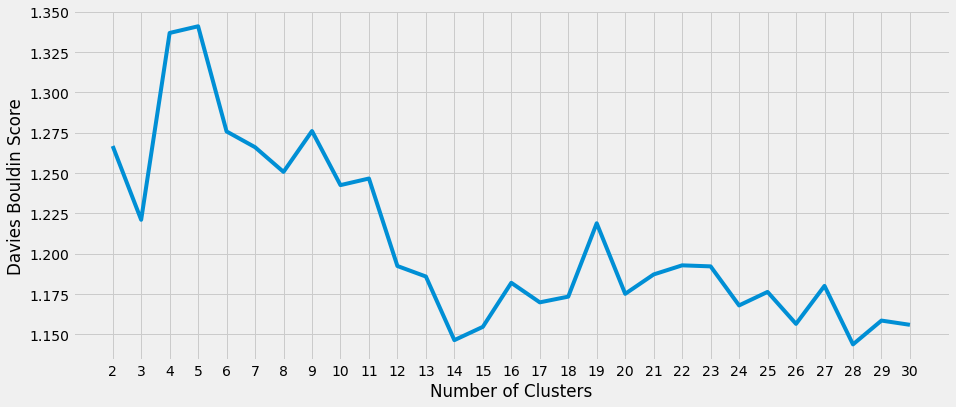

In [16]:
plt.figure(figsize=(14,6))
plt.style.use("fivethirtyeight")
plt.plot(range(2, len(davies_scores)+2), davies_scores)
plt.xticks(range(2, len(davies_scores)+2))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies Bouldin Score")
plt.show()